In [1]:
pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/diabetes.csv")
display(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

<Axes: xlabel='Pregnancies', ylabel='Count'>

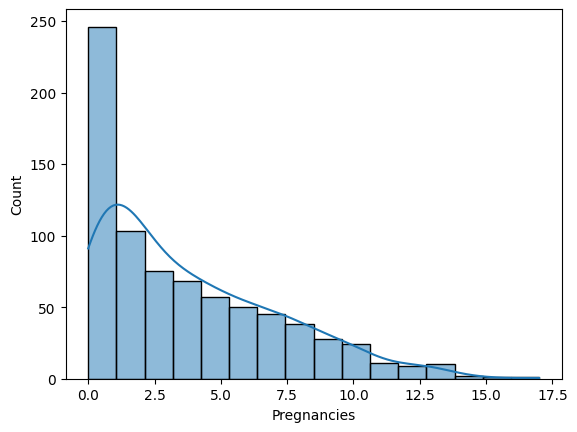

In [6]:
sns.histplot(data = data, x = 'Pregnancies', kde = True)

<Axes: xlabel='Glucose', ylabel='Count'>

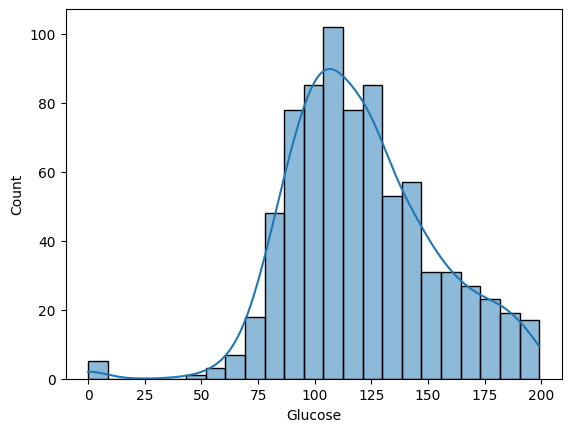

In [7]:
sns.histplot(data = data, x = 'Glucose', kde = True)

<Axes: xlabel='BloodPressure', ylabel='Count'>

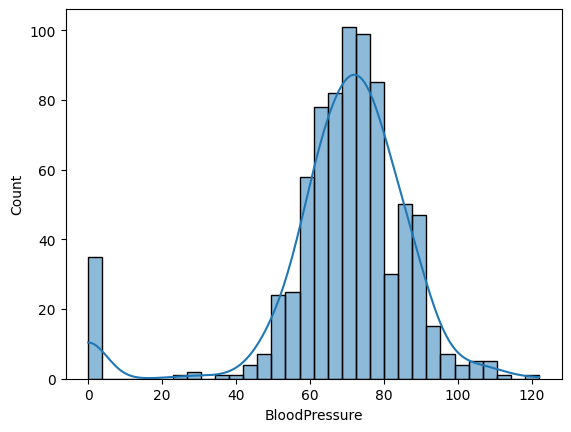

In [8]:
sns.histplot(data = data, x = 'BloodPressure', kde = True)

<Axes: xlabel='SkinThickness', ylabel='Count'>

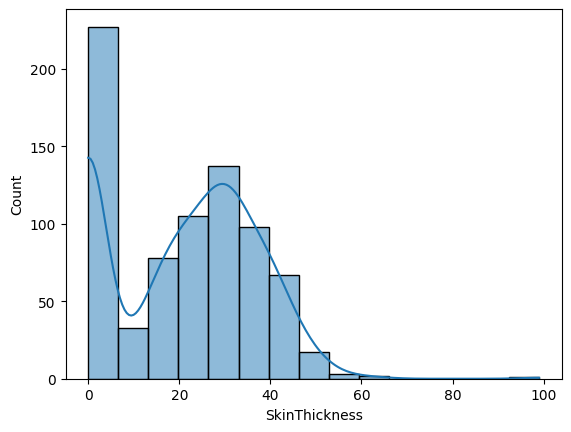

In [9]:
sns.histplot(data = data, x = 'SkinThickness', kde = True)

<Axes: xlabel='Insulin', ylabel='Count'>

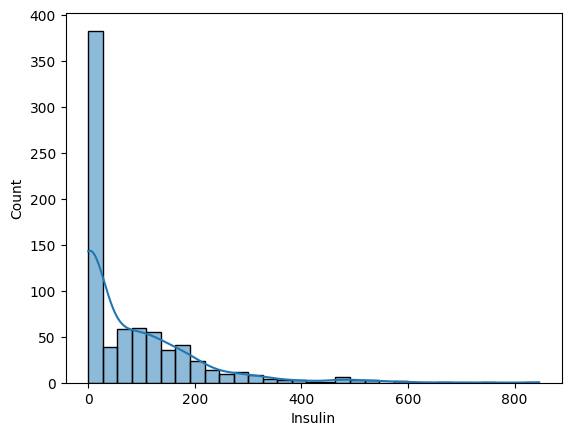

In [10]:
sns.histplot(data = data, x = 'Insulin', kde = True)

<Axes: xlabel='BMI', ylabel='Count'>

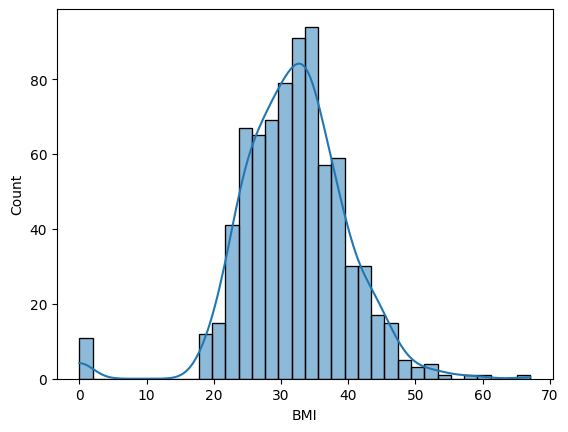

In [11]:
sns.histplot(data = data, x = 'BMI', kde = True)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

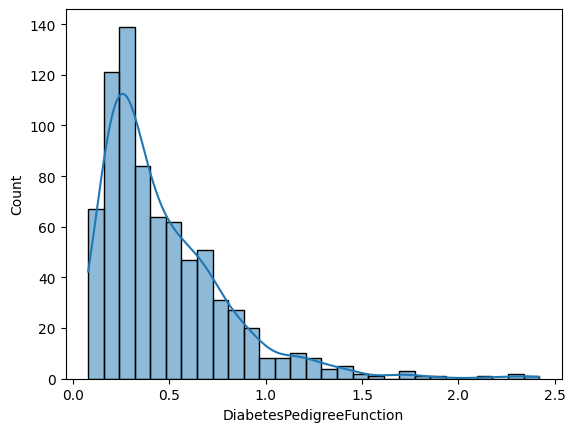

In [12]:
sns.histplot(data = data, x = 'DiabetesPedigreeFunction', kde = True)

<Axes: xlabel='Age', ylabel='Count'>

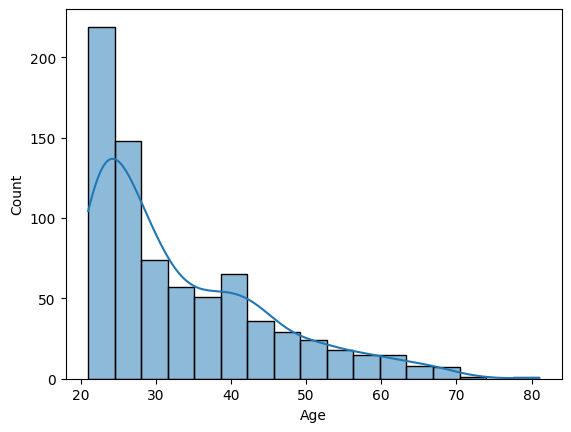

In [13]:
sns.histplot(data = data, x = 'Age', kde = True)

In [14]:
data[data['Outcome'] == 0].count()

Pregnancies                 500
Glucose                     500
BloodPressure               500
SkinThickness               500
Insulin                     500
BMI                         500
DiabetesPedigreeFunction    500
Age                         500
Outcome                     500
dtype: int64

In [15]:
data[data['Outcome'] == 1].count()

Pregnancies                 268
Glucose                     268
BloodPressure               268
SkinThickness               268
Insulin                     268
BMI                         268
DiabetesPedigreeFunction    268
Age                         268
Outcome                     268
dtype: int64

In [16]:
from sklearn.utils import resample

majority_class = data[data['Outcome'] == 0]
minority_class = data[data['Outcome'] == 1]
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
data_balanced = pd.concat([majority_class, minority_upsampled], ignore_index = True)
display(data_balanced)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,1,89,66,23,94,28.1,0.167,21,0
2,5,116,74,0,0,25.6,0.201,30,0
3,10,115,0,0,0,35.3,0.134,29,0
4,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
995,7,168,88,42,321,38.2,0.787,40,1
996,8,143,66,0,0,34.9,0.129,41,1
997,3,130,78,23,79,28.4,0.323,34,1
998,6,115,60,39,0,33.7,0.245,40,1


In [17]:
data_balanced[data_balanced['Outcome'] == 0].count()


Pregnancies                 500
Glucose                     500
BloodPressure               500
SkinThickness               500
Insulin                     500
BMI                         500
DiabetesPedigreeFunction    500
Age                         500
Outcome                     500
dtype: int64

In [18]:
data_balanced[data_balanced['Outcome'] == 1].count()

Pregnancies                 500
Glucose                     500
BloodPressure               500
SkinThickness               500
Insulin                     500
BMI                         500
DiabetesPedigreeFunction    500
Age                         500
Outcome                     500
dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, ValidationCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [20]:
y = data['Outcome']
y_b = data_balanced['Outcome']
data = data.drop('Outcome', axis = 1)
data_balanced = data_balanced.drop('Outcome', axis = 1)

In [21]:
std = StandardScaler()
data = std.fit_transform(data)
data_balanced = std.fit_transform(data_balanced)

In [22]:
display(data)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [23]:
display(data_balanced)

array([[-0.89511603, -1.25513659, -0.21517238, ..., -0.77277546,
        -0.38393058, -0.28171954],
       [-0.89511603, -1.12702548, -0.21517238, ..., -0.57484782,
        -0.94627816, -1.14245752],
       [ 0.22693477, -0.26227547,  0.20102178, ..., -0.90472721,
        -0.84236611, -0.36779334],
       ...,
       [-0.33409063,  0.18611342,  0.40911886, ..., -0.5352623 ,
        -0.46950522, -0.02349815],
       [ 0.50744747, -0.29430325, -0.52731801, ...,  0.16408201,
        -0.70789169,  0.49294464],
       [-0.05357793,  1.91561342,  0.40911886, ...,  0.5995228 ,
        -0.64982319, -0.28171954]])

In [24]:
n = int(input())
poly = PolynomialFeatures(degree = n)
data_poly = poly.fit_transform(data)
data_balanced_poly = poly.fit_transform(data_balanced)

8


In [25]:
print(data_poly.shape)
print(data_balanced_poly.shape)

(768, 12870)
(1000, 12870)


In [26]:
display(data_poly)

array([[ 1.00000000e+00,  6.39947260e-01,  8.48323795e-01, ...,
         1.84549585e+00,  5.61731838e+00,  1.70979880e+01],
       [ 1.00000000e+00, -8.44885053e-01, -1.12339636e+00, ...,
         6.40398911e-06,  3.34481511e-06,  1.74700299e-06],
       [ 1.00000000e+00,  1.23388019e+00,  1.94372388e+00, ...,
         5.06101325e-07, -8.84125022e-08,  1.54450703e-08],
       ...,
       [ 1.00000000e+00,  3.42980797e-01,  3.30087080e-03, ...,
         2.06448001e-04,  8.30860800e-05,  3.34384284e-05],
       [ 1.00000000e+00, -8.44885053e-01,  1.59786597e-01, ...,
         3.54592497e-01, -1.11865185e+00,  3.52907058e+00],
       [ 1.00000000e+00, -8.44885053e-01, -8.73019198e-01, ...,
         9.82630139e-02,  1.80722943e-01,  3.32381238e-01]])

In [27]:
display(data_balanced_poly)

array([[ 1.00000000e+00, -8.95116026e-01, -1.25513659e+00, ...,
         7.36897775e-05,  5.40718845e-05,  3.96767203e-05],
       [ 1.00000000e+00, -8.95116026e-01, -1.12702548e+00, ...,
         1.99103088e+00,  2.40380502e+00,  2.90215416e+00],
       [ 1.00000000e+00,  2.26934774e-01, -2.62275473e-01, ...,
         1.75640604e-03,  7.66880852e-04,  3.34835014e-04],
       ...,
       [ 1.00000000e+00, -3.34090626e-01,  1.86113417e-01, ...,
         3.71092792e-11,  1.85727284e-12,  9.29541748e-14],
       [ 1.00000000e+00,  5.07447475e-01, -2.94303251e-01, ...,
         7.18989453e-03, -5.00672634e-03,  3.48646402e-03],
       [ 1.00000000e+00, -5.35779257e-02,  1.91561342e+00, ...,
         2.11101946e-04,  9.15195763e-05,  3.96767203e-05]])

In [ ]:
data = np.tile(data, (10, 10))
data_balanced = np.tile(data_balanced, (10, 10))
data_poly = np.tile(data_poly, (10, 10))
data_balanced_poly = np.tile(data_balanced_poly, (10, 10))
y = np.tile(y, 10)
y_b = np.tile(y_b, 10)


In [28]:
x_train, x_temp, y_train, y_temp = train_test_split(data, y, test_size=0.4, random_state=42, stratify = y)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify = y_temp)
x_train_b, x_temp_b, y_train_b, y_temp_b = train_test_split(data_balanced, y_b, test_size=0.4, random_state=42, stratify = y_b)
x_val_b, x_test_b, y_val_b, y_test_b = train_test_split(x_temp_b, y_temp_b, test_size=0.5, random_state=42, stratify = y_temp_b) #b for balanced
x_train_p, x_temp_p, y_train_p, y_temp_p = train_test_split(data_poly, y, test_size=0.4, random_state=42, stratify = y)
x_val_p, x_test_p, y_val_p, y_test_p = train_test_split(x_temp_p, y_temp_p, test_size=0.5, random_state=42, stratify = y_temp_p)
x_train_b_p, x_temp_b_p, y_train_b_p, y_temp_b_p = train_test_split(data_balanced_poly, y_b, test_size=0.4, random_state=42, stratify = y_b)
x_val_b_p, x_test_b_p, y_val_b_p, y_test_b_p = train_test_split(x_temp_b_p, y_temp_b_p, test_size=0.5, random_state=42, stratify = y_temp_b_p) #p for polygonal features

In [29]:
print(x_train.shape, x_test.shape, x_val.shape)
print(x_train_b.shape, x_test_b.shape, x_val_b.shape)
print(x_train_p.shape, x_test_p.shape, x_val_p.shape)
print(x_train_b_p.shape, x_test_b_p.shape, x_val_b_p.shape)

(460, 8) (154, 8) (154, 8)
(600, 8) (200, 8) (200, 8)
(460, 12870) (154, 12870) (154, 12870)
(600, 12870) (200, 12870) (200, 12870)


In [30]:
model_logreg = LogisticRegression(random_state = 42, max_iter = 10000)

In [31]:
def kfold(input_data, output_data):
    kf = KFold( n_splits = int(input_data.shape[0]/10), shuffle = True, random_state = 42)
    scores = cross_val_score(model_logreg, input_data, output_data, cv = kf)
    print("Cross validation scores : ", scores)
    print("Mean cross validation score : ", np.mean(scores))

In [ ]:
kfold(x_train, y_train)
kfold(x_train_b, y_train_b)
kfold(x_train_p, y_train_p)
kfold(x_train_b_p, y_train_b_p)


Cross validation scores :  [1.  0.7 0.7 0.8 0.9 0.7 0.6 0.7 0.9 0.8 0.8 0.8 0.9 0.9 0.7 0.9 0.9 0.7
 0.9 0.8 0.8 0.8 0.7 0.5 0.8 0.5 0.6 0.7 0.8 1.  0.9 0.6 0.7 0.8 1.  1.
 0.8 1.  0.8 0.9 0.7 0.8 0.8 0.6 0.8 0.7]
Mean cross validation score :  0.7869565217391304
Cross validation scores :  [0.8 0.4 0.8 0.7 0.6 0.6 0.7 0.8 0.8 0.7 0.6 0.7 0.9 1.  0.7 0.7 0.8 0.8
 0.8 0.6 0.7 0.8 0.7 0.9 0.6 0.6 0.7 0.8 0.5 0.6 0.6 0.6 0.7 0.8 0.6 0.8
 0.9 0.8 0.7 0.9 0.7 0.8 0.6 0.9 0.7 0.8 0.7 0.9 0.9 0.7 0.7 0.9 0.8 0.4
 0.6 0.9 0.6 0.9 0.8 0.9]
Mean cross validation score :  0.7333333333333333
Cross validation scores :  [0.7 0.5 0.6 0.6 0.7 0.6 0.6 0.5 0.8 0.7 0.6 0.7 0.9 0.8 0.7 0.7 0.8 0.6
 0.7 0.9 0.9 0.6 0.8 0.5 0.5 0.4 0.3 0.9 0.7 0.5 0.8 0.9 0.7 0.8 0.9 0.9
 0.6 0.8 0.7 0.9 0.6 0.7 0.6 0.9 0.7 0.9]
Mean cross validation score :  0.7
